In [65]:
# 라이브러리 
import pandas as pd

## EDA

In [66]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [67]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [68]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [69]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [70]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [71]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

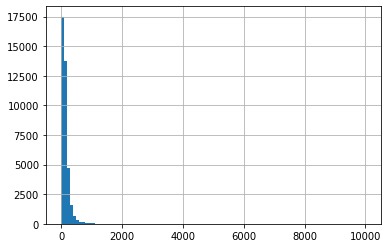

In [72]:
# target(hist)
train['price'].hist(bins=100)

In [73]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [74]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

## 데이터 전처리

In [75]:
# 결측치 컬럼 삭제(last_review)
train.drop(["last_review"], inplace=True, axis=1)
test.drop(["last_review"], inplace=True, axis=1)

In [76]:
# 수치형 변수 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

display(train.head(1))
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])
display(train.head(1))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,0.335962,Gilles,Manhattan,Harlem,1.336232,-0.122644,Private room,70,-0.19649,-0.454665,-0.761575,-0.155868,-0.858043


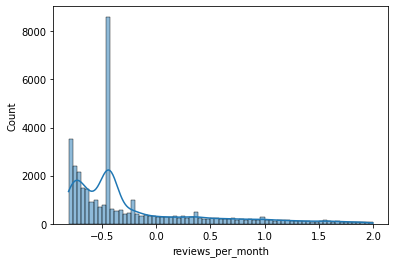

In [77]:
# 이상치 제거 후 결측치 채우기
# [[YOUR CODE]]
Q3 = train["reviews_per_month"].quantile(0.75)
Q1 = train["reviews_per_month"].quantile(0.25)

IQR = Q3 - Q1

cond = (train["reviews_per_month"] > Q3 + IQR  * 1.5) | (train["reviews_per_month"] < Q1 - IQR  * 1.5)

train = train[~cond] # 이상치 제거

train["reviews_per_month"].fillna(train["reviews_per_month"].median(), inplace=True) # 결측치 채우기
test["reviews_per_month"].fillna(test["reviews_per_month"].median(), inplace=True) # 결측치 채우기

train["name"].fillna("unknown", inplace=True)
train["host_name"].fillna("unknown", inplace=True)
test["name"].fillna("unknown", inplace=True)
test["host_name"].fillna("unknown", inplace=True)

import seaborn as sns

sns.histplot(train["reviews_per_month"], kde=True);

In [78]:
train.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [79]:
y = train["price"]
y

0         70
1        240
2        150
3         85
4         44
        ... 
39110    135
39111    185
39113    120
39114    165
39115    200
Name: price, Length: 37676, dtype: int64

In [80]:
X = train.select_dtypes(include="number").drop("price", axis=1)
X

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.335962,1.336232,-0.122644,-0.196490,-0.454665,-0.761575,-0.155868,-0.858043
1,9458704,-0.237602,0.578404,-0.820543,-0.245726,0.913398,0.182641,-0.155868,1.131740
2,26871281,-0.853940,0.021318,-1.154068,2.610001,-0.499519,-0.696252,-0.186486,-0.858043
3,698132,-0.814130,-0.689353,0.336438,-0.147253,4.838168,0.901195,-0.155868,-0.850449
4,15783953,-0.701233,-0.731373,-0.073888,1.034427,-0.521946,-0.434960,-0.186486,-0.858043
...,...,...,...,...,...,...,...,...,...
39110,4649627,-0.739083,-1.076157,-0.576548,-0.245726,1.451652,0.135133,-0.094632,-0.858043
39111,35425034,0.507318,-0.339431,-1.191174,1.132900,-0.521946,-0.434960,-0.155868,1.769686
39113,13261616,-0.546210,0.882269,0.148534,0.000457,-0.521946,-0.434960,-0.186486,-0.858043
39114,531258,-0.826412,0.041318,-1.014057,1.132900,-0.095828,-0.678437,-0.186486,1.108956


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [82]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(n_estimators=100, learning_rate = 0.05, max_depth=4)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Validation 데이터의 평균 제곱 오차(MSE):", mse)

Validation 데이터의 평균 제곱 오차(MSE): 67280.57679874344


In [83]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test.select_dtypes(include="number"))
mean_squared_error(y_test, pred)

48184.036474134744